In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [50]:
dataset_path = "/content/drive/MyDrive/17Flowers/train"

image_data_generator = ImageDataGenerator(
    rescale=1./255.5,
    validation_split=0.1,
    horizontal_flip=True,
    brightness_range=(0.8,0.1)
)

dataset_train = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

dataset_validation = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [51]:
dataset_train.class_indices

{'bluebell': 0,
 'buttercup': 1,
 'coltsfoot': 2,
 'cowslip': 3,
 'crocus': 4,
 'daffodil': 5,
 'daisy': 6,
 'dandelion': 7,
 'fritillary': 8,
 'iris': 9,
 'lilyvalley': 10,
 'pansy': 11,
 'snowdrop': 12,
 'sunflower': 13,
 'tigerlily': 14,
 'tulip': 15,
 'windflower': 16}

In [52]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="avg",
    classes=17,
)

for layer in base_model.layers[:-4]:
    layer.trainable = False

In [53]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 412,160 (1.57 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

In [54]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17,activation="softmax")
])

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,424,145 (9.25 MB)

 Trainable params: 578,321 (2.21 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

In [56]:
model.compile(
    optimizer="RMSprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [57]:
history = model.fit(dataset_train,validation_data=dataset_train,epochs=6)

Epoch 1/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 736ms/step - accuracy: 0.3838 - loss: 2.1131 - val_accuracy: 0.7632 - val_loss: 0.7276
Epoch 2/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 470ms/step - accuracy: 0.7391 - loss: 0.8807 - val_accuracy: 0.8649 - val_loss: 0.4330
Epoch 3/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 474ms/step - accuracy: 0.8466 - loss: 0.5224 - val_accuracy: 0.9146 - val_loss: 0.2767
Epoch 4/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.8494 - loss: 0.4629 - val_accuracy: 0.9092 - val_loss: 0.2692
Epoch 5/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.8595 - loss: 0.4465 - val_accuracy: 0.9038 - val_loss: 0.3015
Epoch 6/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - accuracy: 0.8960 - loss: 0.3200 - val_accuracy: 0.9168 - val_loss: 0.2728


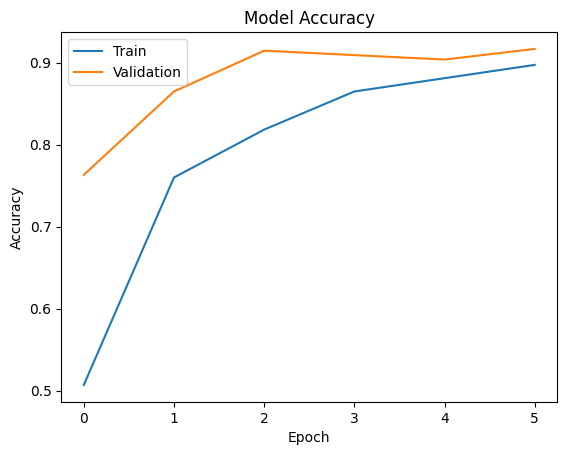

In [58]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

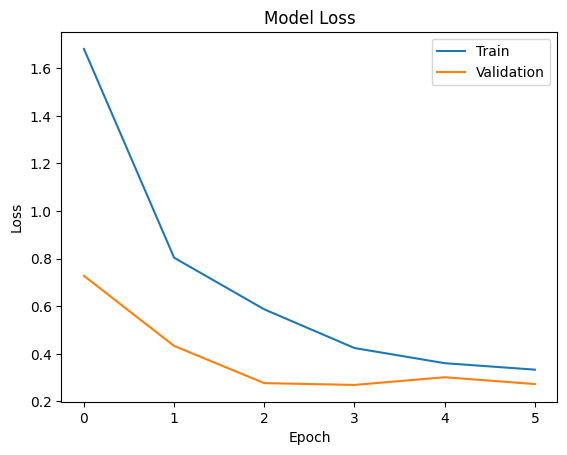

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


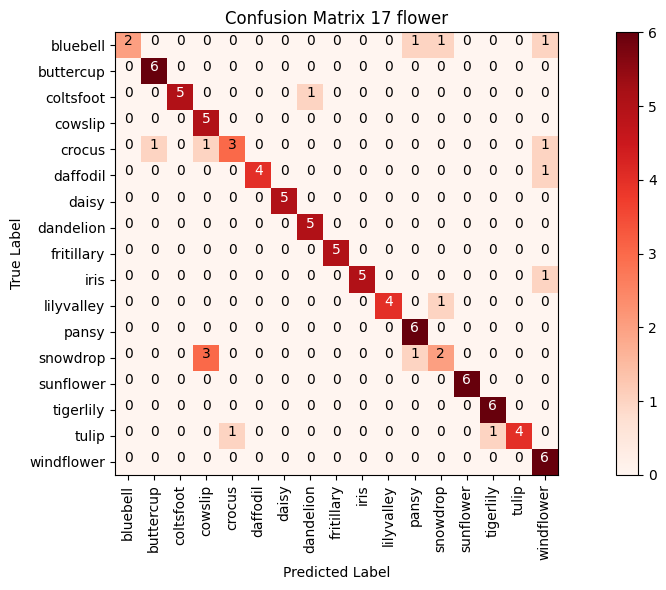

In [60]:
y_pred = model.predict(dataset_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = dataset_validation.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix 17 flower')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()), rotation=90)
plt.yticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()))
plt.tight_layout()
plt.show()

In [61]:
model.save("model.h5")